In [194]:
!pip install gensim scikit-learn

In [195]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [196]:
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

In [197]:
data.head()

,Nama Product,Categories
0,Nasi Goreng,Food
1,Es Teh,Food
2,Bakso,Food
3,Mie Ayam,Food
4,Pulsa,Elektronik


In [198]:
vocab = data['Nama Product']
vocab = [text.lower() for text in vocab]

In [199]:
labels = data['Categories']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(integer_encoded, num_classes=3)
one_hot_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [200]:
vocab_size = 500
max_length = 4
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [201]:
tokenizer = Tokenizer(num_words = vocab_size , oov_token=oov_tok)
tokenizer.fit_on_texts(vocab)
word_index  = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(vocab)
padded_sequences = pad_sequences(sequences, padding=trunc_type,maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(vocab)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)

print(word_index)
print(sequences)


{'<OOV>': 1, 'baju': 2, 'es': 3, 'kekinian': 4, 'kaos': 5, 'nasi': 6, 'goreng': 7, 'rice': 8, 'mie': 9, 'kopi': 10, 'batik': 11, 'sepatu': 12, 'martabak': 13, 'kue': 14, 'cheese': 15, 'keripik': 16, 'cake': 17, 'teh': 18, 'bakso': 19, 'ayam': 20, 'susu': 21, 'kopiko': 22, 'angin': 23, 'kulkas': 24, 'toshiba': 25, 'ac': 26, 'panasonic': 27, 'sharp': 28, 'mesin': 29, 'cuci': 30, 'lg': 31, 'oppo': 32, 'laptop': 33, 'asus': 34, 'blender': 35, 'philips': 36, 'kebaya': 37, 'tas': 38, 'celana': 39, 'kemeja': 40, 'sandal': 41, 'tahu': 42, 'gado': 43, 'manis': 44, 'caramel': 45, 'seblak': 46, 'pisang': 47, 'gulung': 48, 'coffee': 49, 'tea': 50, 'krim': 51, 'churros': 52, 'macem': 53, 'klepon': 54, 'tart': 55, 'cookies': 56, 'black': 57, 'apple': 58, 'audio': 59, 'pulsa': 60, 'token': 61, 'listrik': 62, 'jeruk': 63, 'cappucino': 64, 'indomie': 65, 'silverqueen': 66, 'tolak': 67, 'kuku': 68, 'bima': 69, 'jahe': 70, 'wangi': 71, 'permen': 72, 'luwak': 73, 'tisu': 74, 'paseo': 75, 'polytron': 76, '

In [202]:
padded_sequences

array([[  6,   7,   0,   0],
       [  3,  18,   0,   0],
       [ 19,   0,   0,   0],
       ...,
       [409, 410,   0,   0],
       [411,   0,   0,   0],
       [412,   0,   0,   0]], dtype=int32)

In [203]:
train_data, test_data, train_labels, test_labels = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42 ,shuffle=True , stratify=labels)

In [204]:
model = Sequential([
          tf.keras.layers.Embedding(vocab_size, 32, input_length=max_length),
          tf.keras.layers.GlobalAveragePooling1D(),
          # tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(15, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [205]:
num_epochs = 50

# Train the model
history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(test_data, test_labels))

Epoch 1/50
9/9 [==============================] - 3s 34ms/step - loss: 1.0982 - accuracy: 0.3732 - val_loss: 1.0897 - val_accuracy: 0.5362
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 1.0831 - accuracy: 0.5217 - val_loss: 1.0795 - val_accuracy: 0.5362
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 1.0708 - accuracy: 0.5217 - val_loss: 1.0677 - val_accuracy: 0.5217
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 1.0521 - accuracy: 0.5254 - val_loss: 1.0498 - val_accuracy: 0.5217
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 1.0275 - accuracy: 0.5254 - val_loss: 1.0312 - val_accuracy: 0.5217
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 1.0027 - accuracy: 0.5254 - val_loss: 1.0108 - val_accuracy: 0.5217
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.9734 - accuracy: 0.5254 - val_loss: 0.9909 - val_accuracy: 0.5362
Epoch 8/50
9/9 [==============

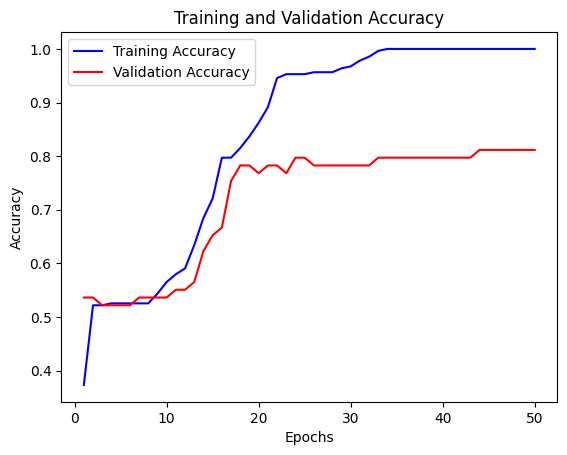

In [206]:
import matplotlib.pyplot as plt

# Mengakses history dari model
history = model.history.history

# Menyimpan akurasi dari data training dan data validasi
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Mengakses epoch
epochs = range(1, len(accuracy) + 1)

# Plotting akurasi training dan validation
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [209]:
text_input = 'asu'

# Ubah teks input menjadi sequence angka menggunakan tokenizer
sequence = tokenizer.texts_to_sequences([text_input])

# Tambahkan padding pada sequence
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Lakukan prediksi menggunakan model
predictions = model.predict(padded_sequence)

predicted_class_index = np.argmax(predictions, axis=1)

# Dapatkan label kelas yang sesuai dari indeks tersebut
predicted_class = label_encoder.inverse_transform(predicted_class_index)

# Output prediksi
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 23ms/step
Predicted Class: ['Elektronik']
